# Graphs & Network Analysis

In [1]:
import networkx as nx
import numpy as np

## Let's build a graph.

In [2]:
G = nx.Graph()

In [3]:
G.add_node(1)

In [4]:
G.add_nodes_from([2,3])

In [5]:
# Adding an edge by giving its nodes
G.add_edge(1,2)

In [6]:
# Adding a single edge given as a pair
e = (2,3)
G.add_edge(*e)

In [7]:
# Adding more than one edge, from a list
G.add_edges_from([(1,2),(1,3)])

In [8]:
# How many edges does G have now?
G.number_of_edges()

3

In [9]:
# Here are some attributes of G
G.nodes, G.edges

(NodeView((1, 2, 3)), EdgeView([(1, 2), (1, 3), (2, 3)]))

In [10]:
list(G.nodes),list(G.edges)

([1, 2, 3], [(1, 2), (1, 3), (2, 3)])

## Let's build another graph another way.

In [11]:
A = np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])

In [12]:
H = nx.from_numpy_matrix(A)

## Let's look at some centrality measures.

In [13]:
nx.betweenness_centrality(H)

{0: 0.10714285714285714,
 1: 0.0,
 2: 0.10714285714285714,
 3: 0.5357142857142857,
 4: 0.21428571428571427,
 5: 0.21428571428571427,
 6: 0.25,
 7: 0.0,
 8: 0.0}

In [14]:
nx.eigenvector_centrality(H)

{0: 0.1957540414970864,
 1: 0.1116880543296416,
 2: 0.19575404149708636,
 3: 0.378751077373384,
 4: 0.4680839101306905,
 5: 0.4680839101306905,
 6: 0.4099765880693859,
 7: 0.3840179229632457,
 8: 0.11695489991950335}

## Let's visualize H using *matplotlib*

In [15]:
import matplotlib.pyplot as plt

In [16]:
#G = nx.petersen_graph()
plt.subplot(121)

nx.draw(H, with_labels=True, font_weight='bold')
plt.subplot(122)

nx.draw_shell(H, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

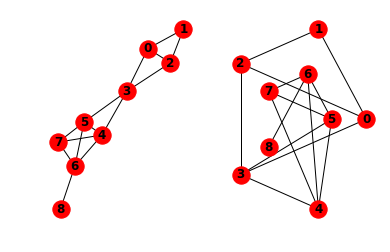

In [17]:
plt.show()

In [18]:
help(nx.draw_shell)

Help on function draw_shell in module networkx.drawing.nx_pylab:

draw_shell(G, **kwargs)
    Draw networkx graph with shell layout.
    
    Parameters
    ----------
    G : graph
       A networkx graph
    
    kwargs : optional keywords
       See networkx.draw_networkx() for a description of optional keywords,
       with the exception of the pos parameter which is not used by this
       function.



## Let's visualize H using *bokeh*

In [19]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure
from bokeh.models.graphs import from_networkx

output_notebook()

plot = figure(title="Networkx Integration Demonstration", x_range=(-2,2), y_range=(-2,2),
              tools="", toolbar_location=None)

graph = from_networkx(H, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

show(plot)

Loading BokehJS ...

## Let's look at centrality and powers of the adjacency matrix

### Recall that H is represented by its adjacency matrix A. Recall also that the entries of A^m count the number of *walks* of length m between node i and node j.

### We will use this to compute the *betweenness centrality* for nodes in H.

In [25]:
A = np.array([[0,1,1,1,0,0,0,0,0],[1,0,1,0,0,0,0,0,0],[1,1,0,1,0,0,0,0,0],[1,0,1,0,1,1,0,0,0],[0,0,0,1,0,1,1,1,0],
             [0,0,0,1,1,0,1,1,0],[0,0,0,0,1,1,0,1,1],[0,0,0,0,1,1,1,0,0],[0,0,0,0,0,0,1,0,0]])
A

array([[0, 1, 1, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 1, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0, 0, 0, 1, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [26]:
# Let's get a list of all powers of A up through the fifth power.
# (Why stop there?)
A_powers = [np.linalg.matrix_power(A,m) for m in [1,2,3,4,5]]

### We need to compute the sigma values from the definition of betweenness centrality. Let's start with sigma for nodes i and j, with no middle node considered.

In [27]:
# We first define a matrix. Next, we will fill it up entry by entry.
sigma = np.zeros((9,9))
sigma

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

### CLAIM: The length of a shortest path from i to j is the smallest m such that the i,j entry of A^m is nonzero. Therefore, the number of shortest paths from i to j is the i,j entry of A^m for this particular m.

### Let's use a nested loop to build sigma. We'll also keep track of the minimal lengths for each pair of nodes.

In [28]:
min_lengths = np.zeros((9,9))

In [29]:
for i in range(9):
    for j in range(9):
        for x in range(5):
            X = A_powers[x].copy()
            if X[i,j] > 0 and i != j:
                sigma[i,j] = X[i,j]
                min_lengths[i,j] = x + 1
                break

### That's just part of it. Now we need to compute the other terms, which depend on one node at a time.

### In order to do this, let's repeat the above calculation with node j isolated from the rest of the graph, then subtract.

In [30]:
def sigma_through_jay(j):
    # Number of shortest paths through node j
    B = A.copy()
    B[j] = np.zeros(9)
    B[:,j] = np.zeros(9)
    B_powers = [np.linalg.matrix_power(B,m) for m in [1,2,3,4,5]]
    B_sigma = np.zeros((9,9))
    B_min_lengths = np.zeros((9,9))
    for i in range(9):
        for k in range(9):
            if i != k:
                X = B_powers[int(min_lengths[i,k]-1)]
                B_sigma[i,k] = X[i,k]
    return (sigma - B_sigma)        

### Let's define a function that takes a node number and returns its betweenness centrality value!

In [31]:
def betweenness(j):
    # Finally, the betweenness
    sigst = sigma_through_jay(j)
    total = 0
    for i in range(9):
        for k in range(i):
            if i != j and k != j:
                total += sigst[i,k] / sigma[i,k]
    # We return a single number.
    return total

In [32]:
btwn_values = [betweenness(x) for x in range(9)]
btwn_values

[3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0]

In [35]:
nx.betweenness_centrality(H, normalized=False).values()

dict_values([3.0, 0.0, 3.0, 15.0, 6.0, 6.0, 7.0, 0.0, 0.0])

### Success! It works on one graph, but...

### Can we clean it up?

### Can we test it more thoroughly?

### Things to think about.